<a href="https://colab.research.google.com/github/ZUHAIR-5421342/Driver-Drowsiness-Dataset-DDD-/blob/main/Alarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Driver Drowsiness Dataset (DDD)

## About Dataset
The Driver Drowsiness Dataset (DDD) is an extracted and cropped faces of drivers from the videos of the Real-Life Drowsiness Dataset. The frames were extracted from videos as images using VLC software. After that, the Viola-Jones algorithm has been used to extract the region of interest from captured images. The obtained dataset (DDD) has been used for training and testing CNN architecture for driver drowsiness detection in the “Detection and Prediction of Driver Drowsiness for the Prevention of Road Accidents Using Deep Neural Networks Techniques” paper.
####(Please cite the following research paper)
https://doi.org/10.1007/978-981-33-6893-4_6
####The dataset has the following properties :
* RGB images
* 2 classes (Drowsy & Non Drowsy)
* Size of image : 227 x 227
* More than 41,790 images in total

## 1. Downloading the Dataset:

In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

# Print the returned path
print("Dataset downloaded to:", path)

Dataset downloaded to: /kaggle/input/driver-drowsiness-dataset-ddd


## 2. Updating the Dataset Path:
* The **os.path.join** function is used to create a new path by combining the original path (where the dataset was downloaded) with a subfolder name, **"Driver Drowsiness Dataset (DDD)"**.
* This is useful for building file paths that work across different operating systems, as it automatically uses the correct path separator (e.g., / for Unix-based systems and \ for Windows).
* The line prints the updated path to the console, showing where the specific subfolder of the dataset is located.
* The **os.listdir** function retrieves a list of all files and directories in the specified dataset_path.
This line prints the contents of the folder, allowing you to see what files are included in the **"Driver Drowsiness Dataset (DDD)"** subfolder.

In [2]:
import os

# Update the dataset path to include the subfolder
dataset_path = os.path.join(path, "Driver Drowsiness Dataset (DDD)")

# Print the contents of the updated dataset path
print("Updated dataset path:", dataset_path)
print("Contents of updated dataset folder:", os.listdir(dataset_path))

Updated dataset path: /kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)
Contents of updated dataset folder: ['Non Drowsy', 'Drowsy']


## 3. Creating Paths for Drowsy and Non-Drowsy Folders:
* These lines define two new paths:
** drowsy_path points to a subfolder named "Drowsy" within the dataset_path.
** non_drowsy_path points to a subfolder named "Non Drowsy" within the same dataset_path.
* The os.path.join function ensures that the paths are constructed correctly, regardless of the operating system.

## Checking if the Drowsy Folder Exists:
* This conditional checks if the folder specified by drowsy_path exists using os.path.exists.
* If it does exist, it lists the contents of the "Drowsy" folder using os.listdir and prints them.
* If it does not exist, it prints a message indicating that the folder does not exist, along with the path where it was expected.

## Checking if the Non-Drowsy Folder Exists:
* This block of code follows the same logic as the previous one but checks for the "Non Drowsy" folder instead.
* It either prints the contents of the "Non Drowsy" folder or indicates that it does not exist.

In [3]:
drowsy_path = os.path.join(dataset_path, "Drowsy")
non_drowsy_path = os.path.join(dataset_path, "Non Drowsy")

# Check if the folders exist
if os.path.exists(drowsy_path):
    print("Drowsy folder contents:", os.listdir(drowsy_path))
else:
    print(f"Drowsy folder does not exist at: {drowsy_path}")

if os.path.exists(non_drowsy_path):
    print("Non Drowsy folder contents:", os.listdir(non_drowsy_path))
else:
    print(f"Non Drowsy folder does not exist at: {non_drowsy_path}")

Drowsy folder contents: ['E0604.png', 'Y0868.png', 'A1012.png', 'U0030.png', 'R0229.png', 'N0503.png', 'W0438.png', 'ZA0739.png', 'M0348.png', 'T0183.png', 'W0475.png', 'ZC0313.png', 'ZA0968.png', 'C0143.png', 'N1173.png', 'F0024.png', 'E1034.png', 'ZB0666.png', 'R0004.png', 'N0620.png', 'ZB0857.png', 'ZB0147.png', 'E0474.png', 'X1723.png', 'Y0282.png', 'ZB0906.png', 'X0214.png', 'G0373.png', 'O1406.png', 'Y1016.png', 'H0456.png', 'B0279.png', 'G0402.png', 'X1588.png', 'ZC0207.png', 'K0146.png', 'U0397.png', 'I1185.png', 'X1218.png', 'A0388.png', 'ZA0112.png', 'ZC0710.png', 'C0021.png', 'N0983.png', 'Y0960.png', 'M0308.png', 'ZC0937.png', 'R0244.png', 'ZA0397.png', 'J0451.png', 'Q0230.png', 'A0955.png', 'I1266.png', 'V0467.png', 'P0524.png', 'T0773.png', 'P0293.png', 'W0219.png', 'E0967.png', 'Y0143.png', 'K0263.png', 'T0815.png', 'Y0870.png', 'ZB1583.png', 'F0142.png', 'O0197.png', 'I1152.png', 'Y0730.png', 'P0033.png', 'ZC0010.png', 'E0837.png', 'ZC0373.png', 'K0576.png', 'X1609.png'

##  4. Prepare image data for training a machine learning model:
* Importing the Required Class.
* Setting Image Dimensions and Batch Size.
* Creating the ImageDataGenerator.
* Creating the Training Data Generator.
* Creating the Validation Data Generator.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Use 20% for validation
)

# Use the updated dataset path
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


## 5. Traverse through a directory tree, printing information about the directories and files it encounters.
###Let's break it down:
* Walking Through the Directory.
* Printing the Root Directory.
* Printing the Subdirectories.
* Printing the Files.
* Separator for Clarity.

In [5]:

for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Root: /kaggle/input/driver-drowsiness-dataset-ddd
Directories: ['Driver Drowsiness Dataset (DDD)']
Files: []
----------------------------------------
Root: /kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)
Directories: ['Non Drowsy', 'Drowsy']
Files: []
----------------------------------------
Root: /kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy
Directories: []
Files: ['e0604.png', 'y0868.png', 'a1012.png', 'c0445.png', 'u0030.png', 'r0229.png', 'n0503.png', 'za0739.png', 'm0348.png', 'zc0313.png', 'za0968.png', 'c0143.png', 'e1034.png', 'zb0666.png', 'r0004.png', 'j0663.png', 'zb0857.png', 'r0278.png', 'zb0147.png', 'e0474.png', 'y0282.png', 'zb0906.png', 'x0867.png', 'x0214.png', 'd0559.png', 'y1016.png', 'h0456.png', 'b0279.png', 'zc0207.png', 'k0146.png', 'u0397.png', 'x1218.png', 'g0077.png', 'a0388.png', 'za0112.png', 'zc0710.png', 'c0021.png', 'n0983.png', 'y0960.png', 'l0347.png', 'm0308.png', 'zc0937.png', 'r024

## 6. builds and compiles a Convolutional Neural Network (CNN) model using TensorFlow's Keras API:
####1-  Importing Necessary Modules.
####2-  Building the CNN Model:
* Import Modules: Import layers and models from Keras.
* Initialize Model: Create a sequential model.
* Add Layers:
** Convolutional layers with ReLU activation (32, 64, 128 filters).
** Max pooling layers (2x2).
* Flatten Output: Convert 2D feature maps to 1D.
* Add Dense Layers:
** Dense layer (128 units, ReLU).
** Dropout layer (0.5 rate).
** Final dense layer (1 unit, sigmoid).

####3- Compiling the Model:
* Use Adam optimizer.
* Binary cross-entropy loss.
* Monitor accuracy.


In [6]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7. Training the Model
* Train the Model:
** Use the fit method on the model to start training.
* Parameters:
** train_data: The training dataset.
** validation_data: The validation dataset.
** epochs=10: Specify the number of training epochs (can be adjusted).
** verbose=1: Set to display training progress.

In [7]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 371s 349ms/step - accuracy: 0.9359 - loss: 0.1408 - val_accuracy: 0.7587 - val_loss: 1.3802
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.5641 - val_loss: 2.4733
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.6216 - val_loss: 1.9096
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.6316 - val_loss: 2.9983
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9977 - loss: 0.0063 - val_accuracy: 0.6490 - val_loss: 3.6297
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 138s 132ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.7905 - val_loss: 1.9487
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.7065 - val_loss: 2.6130
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - ac

## 8. Evaluating the Model
* Evaluate the Model:
** Use the evaluate method on the model to assess performance.
* Parameters:
** val_data: The validation dataset for evaluation.
* Capture Metrics:
** Store the validation loss and accuracy in val_loss and val_accuracy.
* Print Results:
** Output the validation loss and accuracy using print.

In [8]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

262/262 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.7556 - loss: 3.4434
Validation Loss: 3.476862668991089
Validation Accuracy: 0.7536491751670837


## 9. Plotting Training and Validation Metrics.

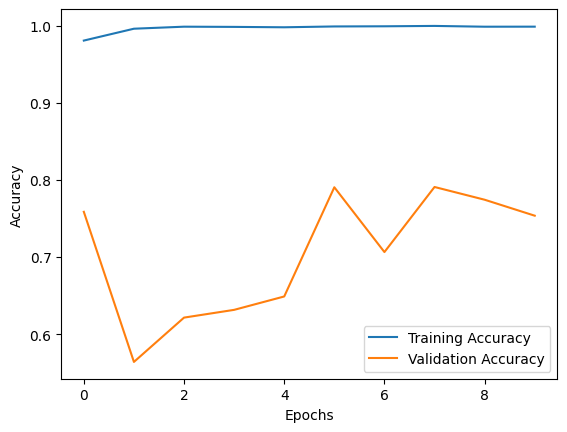

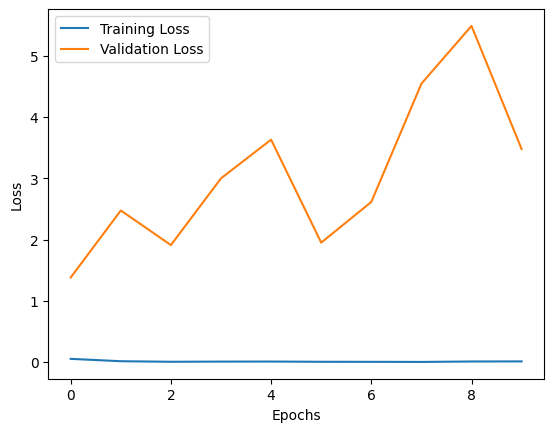

In [9]:

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 10. Test the model.

In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Path to a new image
img_path = "Image"

# Preprocess the image
img = load_img(img_path, target_size=(img_height, img_width))
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Prediction: Drowsy")
else:
    print("Prediction: Non Drowsy")

FileNotFoundError: [Errno 2] No such file or directory: 'Image'

## 11. Save the model.

In [11]:
# Save the model in the native Keras format
model.save("drowsiness_detection_model.keras")

## Loading and Compiling the Model.


In [12]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("drowsiness_detection_model.keras")  # Or .h5 if you're using the legacy format

# Recompile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [13]:
# Save the model in the Keras native format
model.save("drowsiness_detection_model.keras")

In [14]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("drowsiness_detection_model.keras")

# Recompile the model (only if you plan to train or evaluate the model)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 12. Real-Time Drowsiness Detection.
* Import Libraries:
** Import cv2, numpy, Keras functions, and playsound.
* Load Model:
** Load the pre-trained drowsiness detection model.
* Set Parameters:
** Define img_height and img_width.
** Specify the alarm sound file path.
* Load Haar Cascades:
** Load Haar cascades for face and eye detection.
* Define Functions:
** preprocess_frame: Resize and normalize input frames.
** detect_drowsiness: Detect faces, predict drowsiness, and display labels.
* Main Function:
** Open the webcam for real-time monitoring.
** Read frames and apply drowsiness detection.
** Display processed frames; exit on 'q' key press.
* Execution:
** Run the main function if executed directly.

In [21]:
import cv2
import numpy as np
import threading
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array
from playsound import playsound

# Load the saved model
model = load_model("drowsiness_detection_model.keras")

# Set parameters
img_height, img_width = 224, 224
alarm_sound = "alarm.mp3"

# Haar cascades for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Flag to track alarm state
alarm_on = False

def preprocess_frame(frame, target_size=(img_height, img_width)):
    """Preprocess the frame for the model."""
    frame_resized = cv2.resize(frame, target_size)
    frame_normalized = frame_resized / 255.0
    frame_array = img_to_array(frame_normalized)
    frame_array = np.expand_dims(frame_array, axis=0)
    return frame_array

def play_alarm():
    """Play alarm sound in a separate thread."""
    try:
        playsound(alarm_sound)
    except Exception as e:
        print(f"Error playing sound: {e}")

def detect_drowsiness(frame):
    """Detect drowsiness in the driver."""
    global alarm_on
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60))

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_preprocessed = preprocess_frame(face)

        prediction = model.predict(face_preprocessed, verbose=0)
        drowsy_prob = prediction[0][0]

        if drowsy_prob > 0.5:
            label = "Drowsy"
            color = (0, 0, 255)

            # Trigger the alarm if not already on
            if not alarm_on:
                alarm_on = True
                threading.Thread(target=play_alarm, daemon=True).start()
        else:
            label = "Not Drowsy"
            color = (0, 255, 0)
            alarm_on = False  # Reset the alarm state

        # Draw label and bounding box
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

def main():
    """Main function for real-time drowsiness detection."""
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Press 'q' to quit.")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        detect_drowsiness(frame)
        cv2.imshow("Drowsiness Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

Error: Could not open webcam.


In [19]:
!pip install pygobject